[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/vibracoes/dropmass.ipynb)

In [1]:
import numpy as np
try:
    from matplolib import pyplot as plt
except ModuleNotFoundError:
    import os
    os.system("pip install matplotlib")
    from matplotlib import pyplot as plt

# Description

There is a system of mass $m_1$ which has connected a spring $k$ and a damper $c$. There is another mass $m_2$ at height $h$ with respect to the mass $m_1$ and both mass is in action of the gravity $g$.


Then, we compute the futher moments given the initial conditions.

In [2]:
k = 10  # Spring constant
m1 = 1  # Mass of object 1
m2 = 1  # Mass of object 2
c = 1.2  # Damper constant
g = 9.8  # Gravity
coef = 0.0 # Colision coefficient, between [0, 1]
inelastic = False if coef else True
print("Initial parameters:")
print("   m1 = %.3f kg" % m1)
print("   m2 = %.3f kg" % m2)
print("    c = %.3f N*s/m" % c)
print("    k = %.3f N/m" % k)
print("    g = %.3f m/s^2" % g)
print(" coef = %.3f" % coef)

Initial parameters:
   m1 = 1.000 kg
   m2 = 1.000 kg
    c = 1.200 N*s/m
    k = 10.000 N/m
    g = 9.800 m/s^2
 coef = 0.000


In [3]:
xi1 = c/(2*np.sqrt(k*m1))
mu1 = np.sqrt(1-xi1**2)
wn1 = np.sqrt(k/m1)
Td1 = 2*np.pi/(mu1*wn1)
xe1 = -m1*g/k
print("Parameters before the contact:")
print("   xi1 = %.3f" % xi1)
print("   mu1 = %.3f" % mu1)
print("   wn1 = %.3f rad/s" % wn1)
print("   Td1 = %.3f s" % Td1)
print("   xe1 = %.3f m" % xe1)

if inelastic:
    wn2 = np.sqrt(k/(m1+m2))
    xi2 = c/(2*np.sqrt(k*(m1+m2)))
    mu2 = np.sqrt(1-xi2**2)
    Td2 = 2*np.pi/(mu2*wn2)
    xe2 = -(m1+m2)*g/k
    print("Parameters after the contact:")
    print("   xi2 = %.3f" % xi2)
    print("   mu2 = %.3f" % mu2)
    print("   wn2 = %.3f rad/s" % wn2)
    print("   Td2 = %.3f s" % Td2)
    print("   xe2 = %.3f m" % xe2)

Parameters before the contact:
   xi1 = 0.190
   mu1 = 0.982
   wn1 = 3.162 rad/s
   Td1 = 2.024 s
   xe1 = -0.980 m
Parameters after the contact:
   xi2 = 0.134
   mu2 = 0.991
   wn2 = 2.236 rad/s
   Td2 = 2.836 s
   xe2 = -1.960 m


In [4]:
x0 = 3
v0 = 1
h = 0.2
y0 = h + x0
u0 = 1

print("Point x:")
print("    Position = x0 = %.3f" % x0)
print("       Speed = v0 = %.3f" % v0)
print("Point y:")
print("    Position = y0 = %.3f" % y0)
print("       Speed = u0 = %.3f" % u0)

Point x:
    Position = x0 = 3.000
       Speed = v0 = 1.000
Point y:
    Position = y0 = 3.200
       Speed = u0 = 1.000


### Describe kinematic equations

The frist object, as we will consider it's underdamped, that means the solution for $x(t)$ in a general way is given by

$$
x(t) = x_e + \exp \left(-\xi \omega t\right) \left[A \cos \mu \omega t + B \sin \mu \omega t\right]
$$

Where

* $x_e$ is the stationary point
* $\xi$ is the damper coefficient
* $\omega$ is the natural frequency
* $\mu$ is $\sqrt{1-\xi^2}$ to facilitate notation
* $A$ and $B$ are dependend on the initial conditions

$$
A = x_0  \ \ \ \ \ \ \ \ \ \ \ \ \ \ B = \dfrac{\xi}{\mu} \cdot x_0 + \dfrac{1}{\mu \omega} \cdot v_0
$$

It's velocity is therefore

$$
v(t) = \omega \exp \left(-\xi \omega t\right)\left[(-\xi A + \mu B) \cos \mu \omega t - (\mu A + \xi B) \sin \mu \omega t\right]
$$

In [5]:
def get_AB(x0: float, v0:float, xi:float, wn:float):
    mu = np.sqrt(1-xi**2)
    A = x0
    B = A * xi/mu + v0/(mu*wn)
    return A, B

def compute_px(t, x0:float, v0:float, xi:float, wn:float, xe:float):
    mu = np.sqrt(1-xi**2)
    A, B = get_AB(x0 - xe, v0, xi, wn)
    COS = np.cos(mu*wn*t)
    SIN = np.sin(mu*wn*t)
    EXP = np.exp(-xi*wn*t)
    return xe + EXP * (A * COS + B * SIN)

def compute_vx(t, x0:float, v0:float, xi:float, wn:float, xe:float):
    mu = np.sqrt(1-xi**2)
    A, B = get_AB(x0 - xe, v0, xi, wn)
    COS = np.cos(mu*wn*t)
    SIN = np.sin(mu*wn*t)
    EXP = np.exp(-xi*wn*t)
    return wn * EXP * ( COS * (-xi * A + mu * B) - SIN * (mu * A + xi * B))

For the second object, we will have only one parabola

$$
y(t) = y_0 + u_0 t - \dfrac{1}{2} g t^2
$$

$$
u(t) = u_0 - g t
$$

In [6]:
def compute_py(t, y0:float, u0:float, g:float):
    return y0 + u0*t - g * t**2/2

def compute_vy(t, y0:float, u0:float, g:float):
    return u0 - g * t

### Compute colision time

Then, with the initial conditions $(x_0, v_0, y_0, u_0)$ we can compute the colision time $T_1$ which is when

$$
x(T_1) = y(T_1)
$$

Unfortunately this is a non-linear equation to solve cause there are terms $\exp$, $\cos$ and $\sin$ with $t$ inside.
To find $T_1$ we can use Newton's method described by the function

$$
f(t) = y(t) - x(t)
$$

$$
t_{i+1} = t_{i} - \dfrac{f(t_i)}{f'(t_i)}
$$

The problem with this method is that $f'(t)$ can be zero in the interval, which allows the method to be very unstable.
So, we compute a time $T_{max}$ that, for sure, the colision would already happened and start the newton's method from this point.

As we know, the mass $m_1$ will oscilate around the stationary point $x_{e}$ with an decreasing amplitude. But it will we always be at

$$
x(t) \in \left[x_{e} - C, \ x_{e} + C\right] \ \ \forall t
$$

Where the $C$ is given by the values of $A$ and $B$

$$
C = \sqrt{A^2 + B^2}
$$

Then, the $T_{max}$ will happen when the object $m_2$ would achieve the position at the minimum of $x$:

$$
y(T_{max}) = x_{e} - C
$$

Calculating is we get that

$$
T_{max} = \dfrac{u_0}{g} + \sqrt{\left(\dfrac{u_0}{g}\right)^2 - \dfrac{2(x_e - C - y_0)}{g}}
$$


In [7]:
def get_Tmax(x0:float, v0:float, y0:float, u0:float, xi:float, wn:float, xe:float):
    """
    Returns the value of Tmax such that y(Tmax) <= x(Tmax) for sure
    To do that, we compute the xmin of the spring from the values (x0, v0, xi, wn)
        We have the stationary point at 'xe', and then the minimum value is xe - Amp
    Then, we found the value when
        y(Tmax) = y0 + u0 * Tmax - g * Tmax^2 /2 = xe - Amp
    """
    A, B = get_AB(x0 - xe, v0, xi, wn)
    Amp = np.sqrt(A**2 + B**2)
    Delta = u0**2 - 2 * g * (xe - Amp - y0)
    return (u0 + np.sqrt(Delta))/g

Tmax = get_Tmax(x0, v0, y0, u0, xi1, wn1, xe1)
print("Tmax = %.3f s" % Tmax)   

Tmax = 1.408 s


And know we start Newton's iteration starting at $T_{max}$.

In [8]:
def find_Tcolision(x0:float, v0:float, y0:float, u0:float, xi:float, wn:float, xe:float):
    T1 = get_Tmax(x0, v0, y0, u0, xi, wn, xe)
    for i in range(3):
        fi = compute_py(T1, y0, u0, g) - compute_px(T1, x0, v0, xi, wn, xe)
        dfi = compute_vy(T1, y0, u0, g) - compute_vx(T1, x0, v0, xi, wn, xe)
        T1 -= fi/dfi
    return T1

T1 = find_Tcolision(x0, v0, y0, u0, xi1, wn1, xe1)
print("Time of first collision = %.3f s" % T1) 

Time of first collision = 1.217 s


### Describe colision

Now we compute how the colision between both objects behave.
There are two extremily states

* Completely Inelastic: When the maximum of energy possible is dissipated
* Completely Elastic: When the energy is conserved

Then we will use one parameter, call $c \in \left[0, \ 1\right]$, such will describe this behavior

* $c = 0$: Completely Inelastic
* $c = 1$: Completely Elastic
* $0 < c < 1$: Intermediate State

Now we describe it mathematically:

* Momentum conservation:

$$
m_1 v_{1b} + m_2 v_{2b} = m_1 v_{1a} + m_2 v_{2a} \ \ \ \ \ \ \ \ \ \ \left(1\right)
$$

Where $v_{1b}$ and $v_{2b}$ are the velocities **before** the colision; $v_{1a}$ and $v_{2a}$ are the velocities **after** the colision.

In the inelastic colision we will have that $v_{i} = v_{1a} = v_{2a}$ with

$$
(m_1+m_2)v_{i} = m_1 v_{1b}+ m_2 v_{2b}  \ \ \ \ \ \ \ \ \ \ \left(2\right)
$$

* Final Kinetic Energy

$$
E_{a} = E_{i} + c ( E_{b} - E_{i})  \ \ \ \ \ \ \ \ \ \ \left(3\right)
$$

Where $E_{i}$ is the Inelastic Energy, $E_{b}$ is the initial energy (**before** the colision) and $E_{a}$ is the final energy (**after** the colision). So we have

$$
E_{b} = \dfrac{1}{2}m_1 v_{1b}^2 + \dfrac{1}{2} m_2 v_{2b}^2   \ \ \ \ \ \ \ \ \ \ \left(4\right)
$$
$$
E_{i} = \dfrac{1}{2}(m_1+m_2) v_{i}^2   \ \ \ \ \ \ \ \ \ \ \left(5\right)
$$
$$
E_{a} = \dfrac{1}{2}m_1 v_{1a}^2 + \dfrac{1}{2} m_2 v_{2b}^2   \ \ \ \ \ \ \ \ \ \ \left(6\right)
$$

With the equations $(1)$, $(2)$, $(3)$, $(4)$, $(5)$ and $(6)$, after some computations we get

$$
v_{1a} = v_{i} - \sqrt{c} \cdot \dfrac{m_2}{m_1+m_2} \cdot (v_{1b}-v_{2b})
$$

$$
v_{2a} = v_{i} + \sqrt{c} \cdot \dfrac{m_1}{m_1+m_2} \cdot (v_{1b}-v_{2b})
$$

Since $v_{1b} > v_{2b}$, we can see that $v_{1a} \le v_{2a}$ 


In [9]:
def compute_colision(m1: float, v1b: float, m2: float, v2b: float, coef: float=0.0):
    # If coef = 0, completly inelastic
    # If coef = 1, completly elastic
    Qmovi = m1*v1b + m2*v2b  # Linear momentum
    vi = Qmovi/(m1+m2)  # Velocity inelastic
    v1a = vi - np.sqrt(coef)*(v1b-v2b)*m2/(m1+m2)
    v2a = vi + np.sqrt(coef)*(v1b-v2b)*m1/(m1+m2)
    return v1a, v2a

Now we can compute the initial velocities before the colision and after the colision:

In [10]:
pac = compute_py(T1, y0, u0, g)  # Colision position
vbx = compute_vx(T1, x0, v0, xi1, wn1, xe1)
vby = compute_vy(T1, y0, u0, g)
vax, vay = compute_colision(m1, vbx, m2, vby, coef)
Ekbx = 0.5*m1*vbx**2
Ekby = 0.5*m2*vby**2
Ekax = 0.5*m1*vax**2
Ekay = 0.5*m2*vay**2
print("At the contact:")
print("               Time = %.3f" % T1)
print("           Position = %.3f" % pac)
print("Before the contact:")
print("      Velocity of x = %.3f" % vbx)
print("      Velocity of y = %.3f" % vby)
print("      Kine energy x = %.3f" % Ekbx)
print("      Kine energy y = %.3f" % Ekby)
print("    Kine energy tot = %.3f" % (Ekbx+Ekby))
print("After the contact:")
print("      Velocity of x = %.3f" % vax)
print("      Velocity of y = %.3f" % vay)
print("      Kine energy x = %.3f" % Ekax)
print("      Kine energy y = %.3f" % Ekay)
print("    Kine energy tot = %.3f" % (Ekax+Ekay))

At the contact:
               Time = 1.217
           Position = -2.836
Before the contact:
      Velocity of x = 3.335
      Velocity of y = -10.922
      Kine energy x = 5.562
      Kine energy y = 59.650
    Kine energy tot = 65.212
After the contact:
      Velocity of x = -3.794
      Velocity of y = -3.794
      Kine energy x = 7.195
      Kine energy y = 7.195
    Kine energy tot = 14.391


### Plotting the curves

Now, we plot the curves of both objects.

In [11]:
t1 = np.linspace(0, T1, 1025)
x1 = compute_px(t1, x0, v0, xi1, wn1, xe1)
y1 = compute_py(t1, y0, u0, g)

if coef == 0:
    Td2 = 2 * np.pi/(mu2*wn2)
    T2 = T1 + 4 * Td2
else:
    T2 = T1 + find_Tcolision(pac, vax, pac, vay, xi1, wn1, xe1)
t2 = np.linspace(T1, T2, 1025)
x1cont = compute_px(t2, x0, v0, xi1, wn1, xe1)
y1cont = compute_py(t2, y0, u0, g)
if inelastic:
    x2 = compute_px(t2-T1, pac, vax, xi2, wn2, xe2)
    y2 = x2
else:
    x2 = compute_px(t2-T1, pac, vax, xi1, wn1, xe1)
    y2 = compute_py(t2-T1, pac, vay, g)

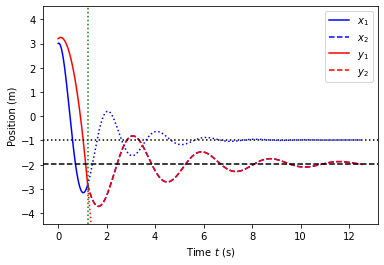

In [12]:
plt.plot(t1, x1, color="b", label=r"$x_1$")
plt.plot(t2, x1cont, color="b", ls="dotted")
plt.plot(t2, x2, color="b", ls="dashed", label=r"$x_{2}$")
plt.plot(t1, y1, color="r", label=r"$y_1$")
plt.plot(t2, y1cont, color="r", ls="dotted")
plt.plot(t2, y2, color="r", ls="dashed", label=r"$y_2$")
plt.axhline(y=xe1, color="k", ls="dotted")
if inelastic:
    plt.axhline(y=xe2, color="k", ls="dashed")
plt.axvline(x=T1, color="g", ls="dotted")
yplotmin = np.min(x1)
yplotmax = np.max([x1, y1, y2])
dyplot = yplotmax - yplotmin
plt.ylim(yplotmin - 0.2*dyplot, yplotmax + 0.2*dyplot)
plt.xlabel("Time $t$ (s)")
plt.ylabel("Position (m)")
plt.legend()

And the velocities are

In [13]:
v1 = compute_vx(t1, x0, v0, xi1, wn1, xe1)
u1 = compute_vy(t1, y0, u0, g)
if inelastic:
    v2 = compute_vx(t2-T1, pac, vax, xi2, wn2, xe2)
    u2 = v2
else:
    v2 = compute_vx(t2-T1, pac, vax, xi1, wn1, xe1)
    u2 = compute_vy(t2-T1, pac, vay, g)


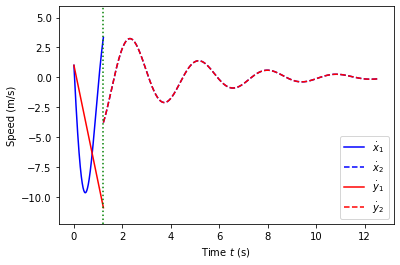

In [14]:
plt.plot(t1, v1, color="b", label=r"$\dot{x}_1$")
plt.plot(t2, v2, color="b", ls="dashed", label=r"$\dot{x}_{2}$")
plt.plot(t1, u1, color="r", label=r"$\dot{y}_1$")
plt.plot(t2, u2, color="r", ls="dashed", label=r"$\dot{y}_2$")
plt.axvline(x=T1, color="g", ls="dotted")
yplotmin = np.min(v1)
yplotmax = np.max([v1, u1, u2])
dyplot = yplotmax - yplotmin
plt.ylim(yplotmin - 0.2*dyplot, yplotmax + 0.2*dyplot)
plt.xlabel("Time $t$ (s)")
plt.ylabel("Speed (m/s)")
plt.legend()

In [15]:
n, m = len(t1), len(t2)
t = np.concatenate([t1, t2])
# Mass m1 energies
Ekx = np.zeros(n+m)
Epx = np.zeros(n+m)
Ekx[:n] += 0.5*m1*v1**2
Ekx[n:] += 0.5*m1*v2**2
Epx[:n] += m1*g*x1+0.5*k*x1**2
Epx[n:] += m1*g*x2+0.5*k*x2**2 

# Masa m2 energies
Eky = np.zeros(n+m)
Epy = np.zeros(n+m)
Eky[:n] += 0.5*m2*u1**2
Eky[n:] += 0.5*m2*u2**2
Epy[:n] += m2*g*y1
Epy[n:] += m2*g*y2

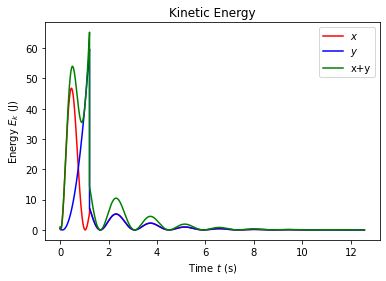

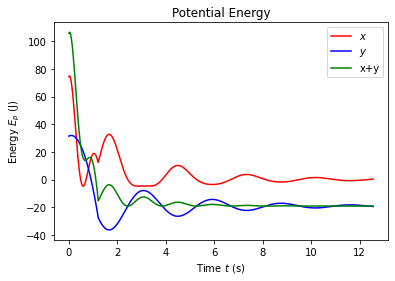

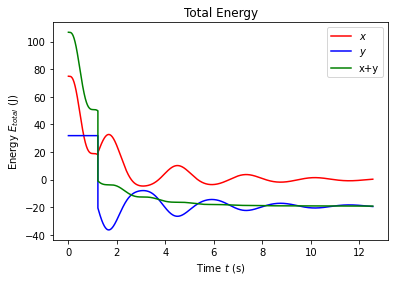

In [16]:
plt.figure()
plt.plot(t, Ekx, color="r", label=r"$x$")
plt.plot(t, Eky, color="b", label=r"$y$")
plt.plot(t, Ekx+Eky, color="g", label=r"x+y")
plt.title("Kinetic Energy")
plt.xlabel(r"Time $t$ (s)")
plt.ylabel(r"Energy $E_{k}$ (J)")
plt.legend()

plt.figure()
plt.plot(t, Epx, color="r", label=r"$x$")
plt.plot(t, Epy, color="b", label=r"$y$")
plt.plot(t, Epx+Epy, color="g", label=r"x+y")
plt.title("Potential Energy")
plt.xlabel(r"Time $t$ (s)")
plt.ylabel(r"Energy $E_{p}$ (J)")
plt.legend()

plt.figure()
plt.plot(t, Ekx+Epx, color="r", label=r"$x$")
plt.plot(t, Eky+Epy, color="b", label=r"$y$")
plt.plot(t, Ekx+Eky+Epx+Epy, color="g", label=r"x+y")
plt.title("Total Energy")
plt.xlabel(r"Time $t$ (s)")
plt.ylabel(r"Energy $E_{total}$ (J)")
plt.legend()

## Online available

This python notebook is available online in GitHub on the link:

* [GitHub/carlos-adir/UnB-Courses/vibracoes/dropmass](https://github.com/carlos-adir/UnB-Courses/blob/main/vibracoes/dropmass.ipynb)